In [1]:
from hiearchical_plan import *
from graph_planner import *
import matplotlib.pyplot as plt

In [2]:
mdp_0 = mdp_0_placeholder

mdp_1 = [
    Option("room_1_quad_1->room_1_quad_2"), Option("room_1_quad_1->room_1_quad_3"),
    Option("room_1_quad_2->room_1_quad_1"), Option("room_1_quad_2->room_1_quad_4"),
    Option("room_1_quad_3->room_1_quad_1"), Option("room_1_quad_3->room_1_quad_4"),
    Option("room_1_quad_4->room_1_quad_2"), Option("room_1_quad_4->room_1_quad_3"),

    Option("room_2_quad_1->room_2_quad_2"), Option("room_2_quad_1->room_2_quad_3"),
    Option("room_2_quad_2->room_2_quad_1"), Option("room_2_quad_2->room_2_quad_4"),
    Option("room_2_quad_3->room_2_quad_1"), Option("room_2_quad_3->room_2_quad_4"),
    Option("room_2_quad_4->room_2_quad_2"), Option("room_2_quad_4->room_2_quad_3"),

    Option("room_3_quad_1->room_3_quad_2"), Option("room_3_quad_1->room_3_quad_3"),
    Option("room_3_quad_2->room_3_quad_1"), Option("room_3_quad_2->room_3_quad_4"),
    Option("room_3_quad_3->room_3_quad_1"), Option("room_3_quad_3->room_3_quad_4"),
    Option("room_3_quad_4->room_3_quad_2"), Option("room_3_quad_4->room_3_quad_3"),

    Option("room_4_quad_1->room_4_quad_2"), Option("room_4_quad_1->room_4_quad_3"),
    Option("room_4_quad_2->room_4_quad_1"), Option("room_4_quad_2->room_4_quad_4"),
    Option("room_4_quad_3->room_4_quad_1"), Option("room_4_quad_3->room_4_quad_4"),
    Option("room_4_quad_4->room_4_quad_2"), Option("room_4_quad_4->room_4_quad_3"),
]


mdp_2 = [
        Option("room_1->room_2"), Option("room_1->room_3"),
        Option("room_2->room_1"), Option("room_2->room_4"),
        Option("room_3->room_1"), Option("room_3->room_4"),
        Option("room_4->room_2"), Option("room_4->room_3"),
    ]

mdp_1 = partition_mdp(mdp_1)
mdp_2 = partition_mdp(mdp_2)

In [3]:
num_test_list = [10, 50, 100, 200, 500, 1000, 2000, 5000, 10000]
gp_mean_list = []
gp_sem_list = []
hp_mean_list = []
hp_sem_list = []

for num_test in num_test_list:

    graph_planner = GraphPlanner([mdp_0, mdp_1, mdp_2])
    graph = graph_planner.build_graph_new()

    hp_planner = Hierarchical_plan()

    list_graph_times = []
    list_hp_times = []
    
    print("num_test = %d" % num_test)

    for i in range(num_test):
        start_state = random.randint(0, 63)
        goal_state = random.randint(0, 63)

        start_time = time.time()
        graph_planner.find_shortest_path(start_state, goal_state)
        end_time = time.time()
        list_graph_times.append(end_time - start_time)


        start_i = start_state // 8
        start_j = start_state % 8

        goal_i = goal_state // 8
        goal_j = goal_state % 8

        arr1 = np.zeros((8,8))
        arr1[start_i, start_j] = 1

        arr2 = np.zeros((8, 8))
        arr2[goal_i, goal_j] = 1 

        start_time = time.time()
        plan = hp_planner.hierarchical_plan_v2(arr1, arr2, 2)
        end_time = time.time()
        list_hp_times.append(end_time - start_time)

    gp_mean_list.append(np.mean(list_graph_times))
    gp_sem_list.append(np.std(list_graph_times)/np.sqrt(num_test))

    hp_mean_list.append(np.mean(list_hp_times))
    hp_sem_list.append(np.std(list_hp_times)/np.sqrt(num_test))


    # print("Average time for graph planner: ", np.mean(list_graph_times))
    # print("Average time for hierarchical planner: ", np.mean(list_hp_times))

num_test = 10
num_test = 50
num_test = 100
num_test = 200
num_test = 500
num_test = 1000
num_test = 2000
num_test = 5000
num_test = 10000


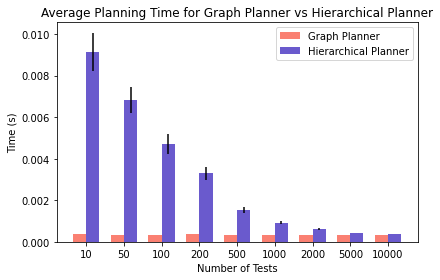

In [5]:
x = np.arange(len(num_test_list))  
width = 0.35  

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, gp_mean_list, width, color='salmon', label='Graph Planner', yerr=gp_sem_list)
rects2 = ax.bar(x + width/2, hp_mean_list, width, color='slateblue', label='Hierarchical Planner', yerr=hp_sem_list)


ax.set_ylabel('Time (s)')
ax.set_xlabel('Number of Tests')
ax.set_title('Average Planning Time for Graph Planner vs Hierarchical Planner')
ax.set_xticks(x)
ax.set_xticklabels(num_test_list)
ax.legend()

fig.tight_layout()
plt.show()

# save figure
fig.savefig('./plots/planning_time.png', dpi=400)